La colonne MEDV (Median Value of Owner-Occupied Homes) est la valeur médiane des maisons en milliers de dollars. C'est la variable cible dans ce dataset, car l'objectif est de prédire le prix des maisons en fonction des autres caractéristiques.

Description des principales colonnes :
*   CRIM : Taux de criminalité par zone.
*   ZN : Proportion de terrains résidentiels pour de grandes maisons.
*   INDUS : Proportion de terrains occupés par des activités non commerciales.
*   CHAS : Variable binaire indiquant si la zone est proche d’une rivière (1 = oui, 0 = non).
*   NOX : Concentration de NO2 (pollution de l'air).
*   RM : Nombre moyen de pièces par maison.
*   AGE : Proportion de maisons construites avant 1940.
*   DIS : Distance aux centres d'emploi.
*   RAD : Accessibilité aux autoroutes principales.
*   TAX : Taux d’imposition foncière.
*   PTRATIO : Ratio élèves/enseignants dans les écoles de la ville.
*   B : Proportion de la population afro-américaine.
*   LSTAT : Pourcentage de la population à faible revenu.
*   MEDV : Valeur médiane des maisons (variable cible).

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [119]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [120]:
df.dtypes

,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,float64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,int64
TAX,int64


In [121]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [122]:
df.shape

(506, 14)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [124]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

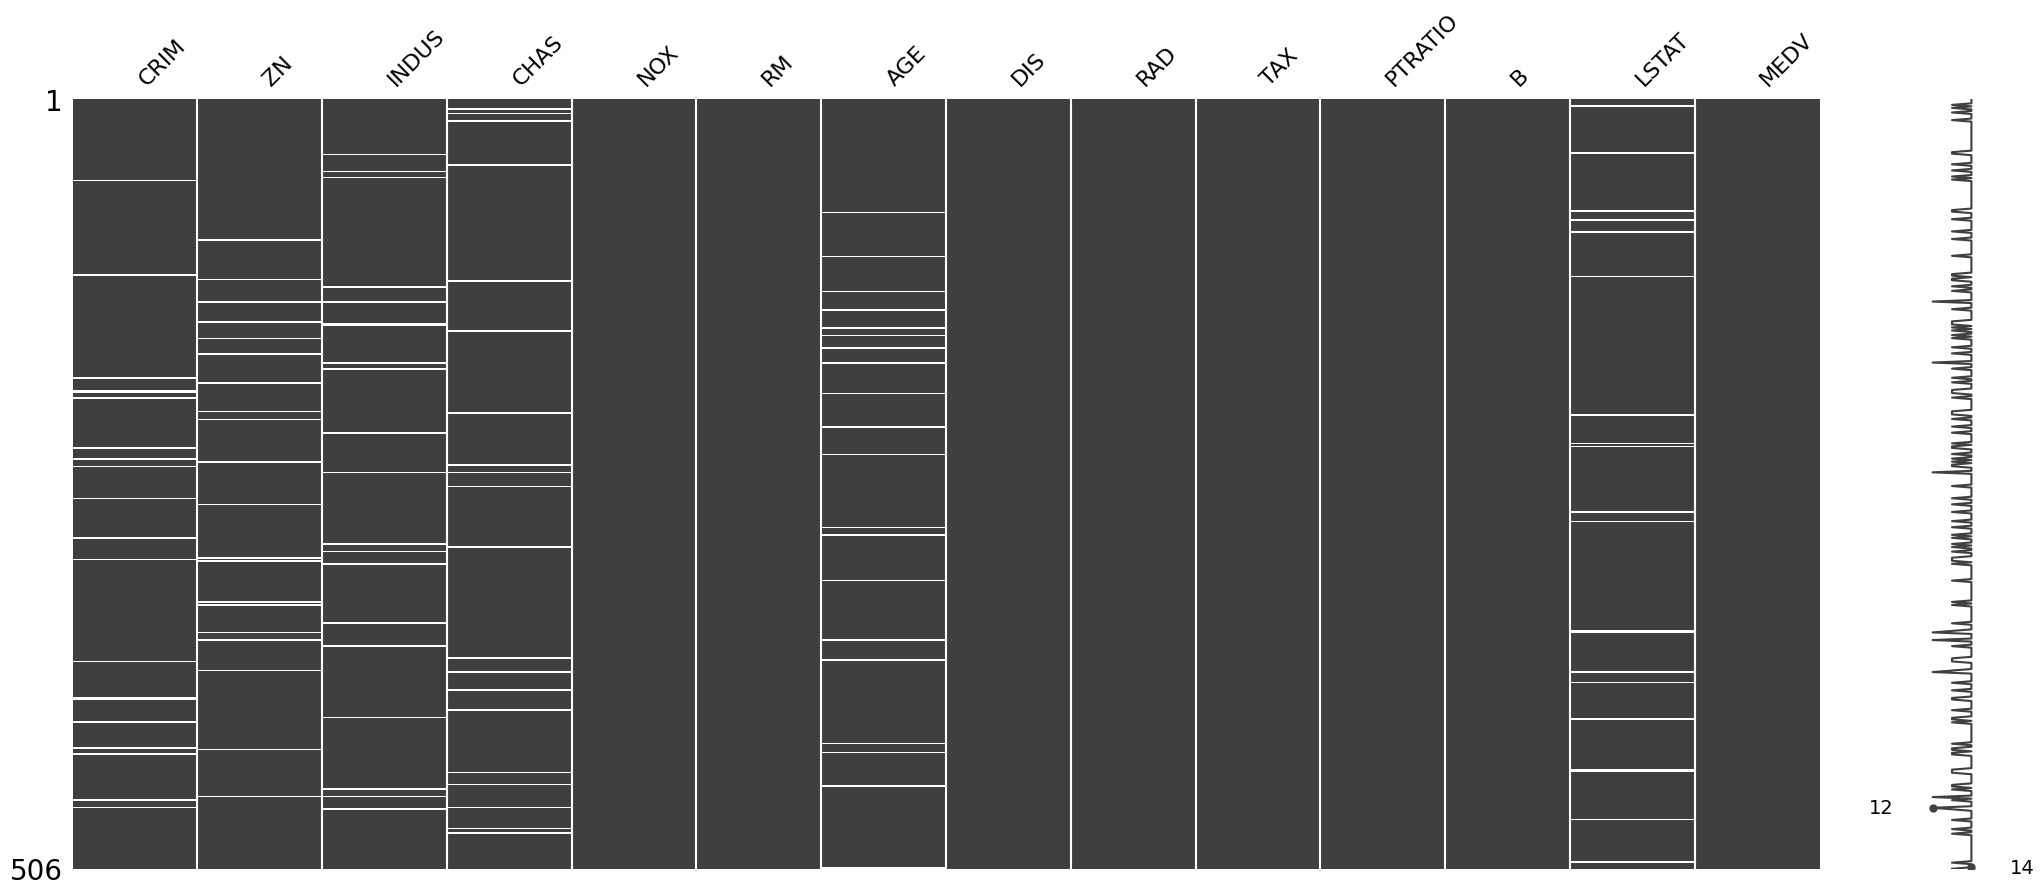

In [125]:
msno.matrix(df)

In [126]:
df.duplicated().sum()

0

In [127]:
df.drop_duplicates(inplace=True)
for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].median())

In [128]:
imputer = SimpleImputer(strategy='median')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [129]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


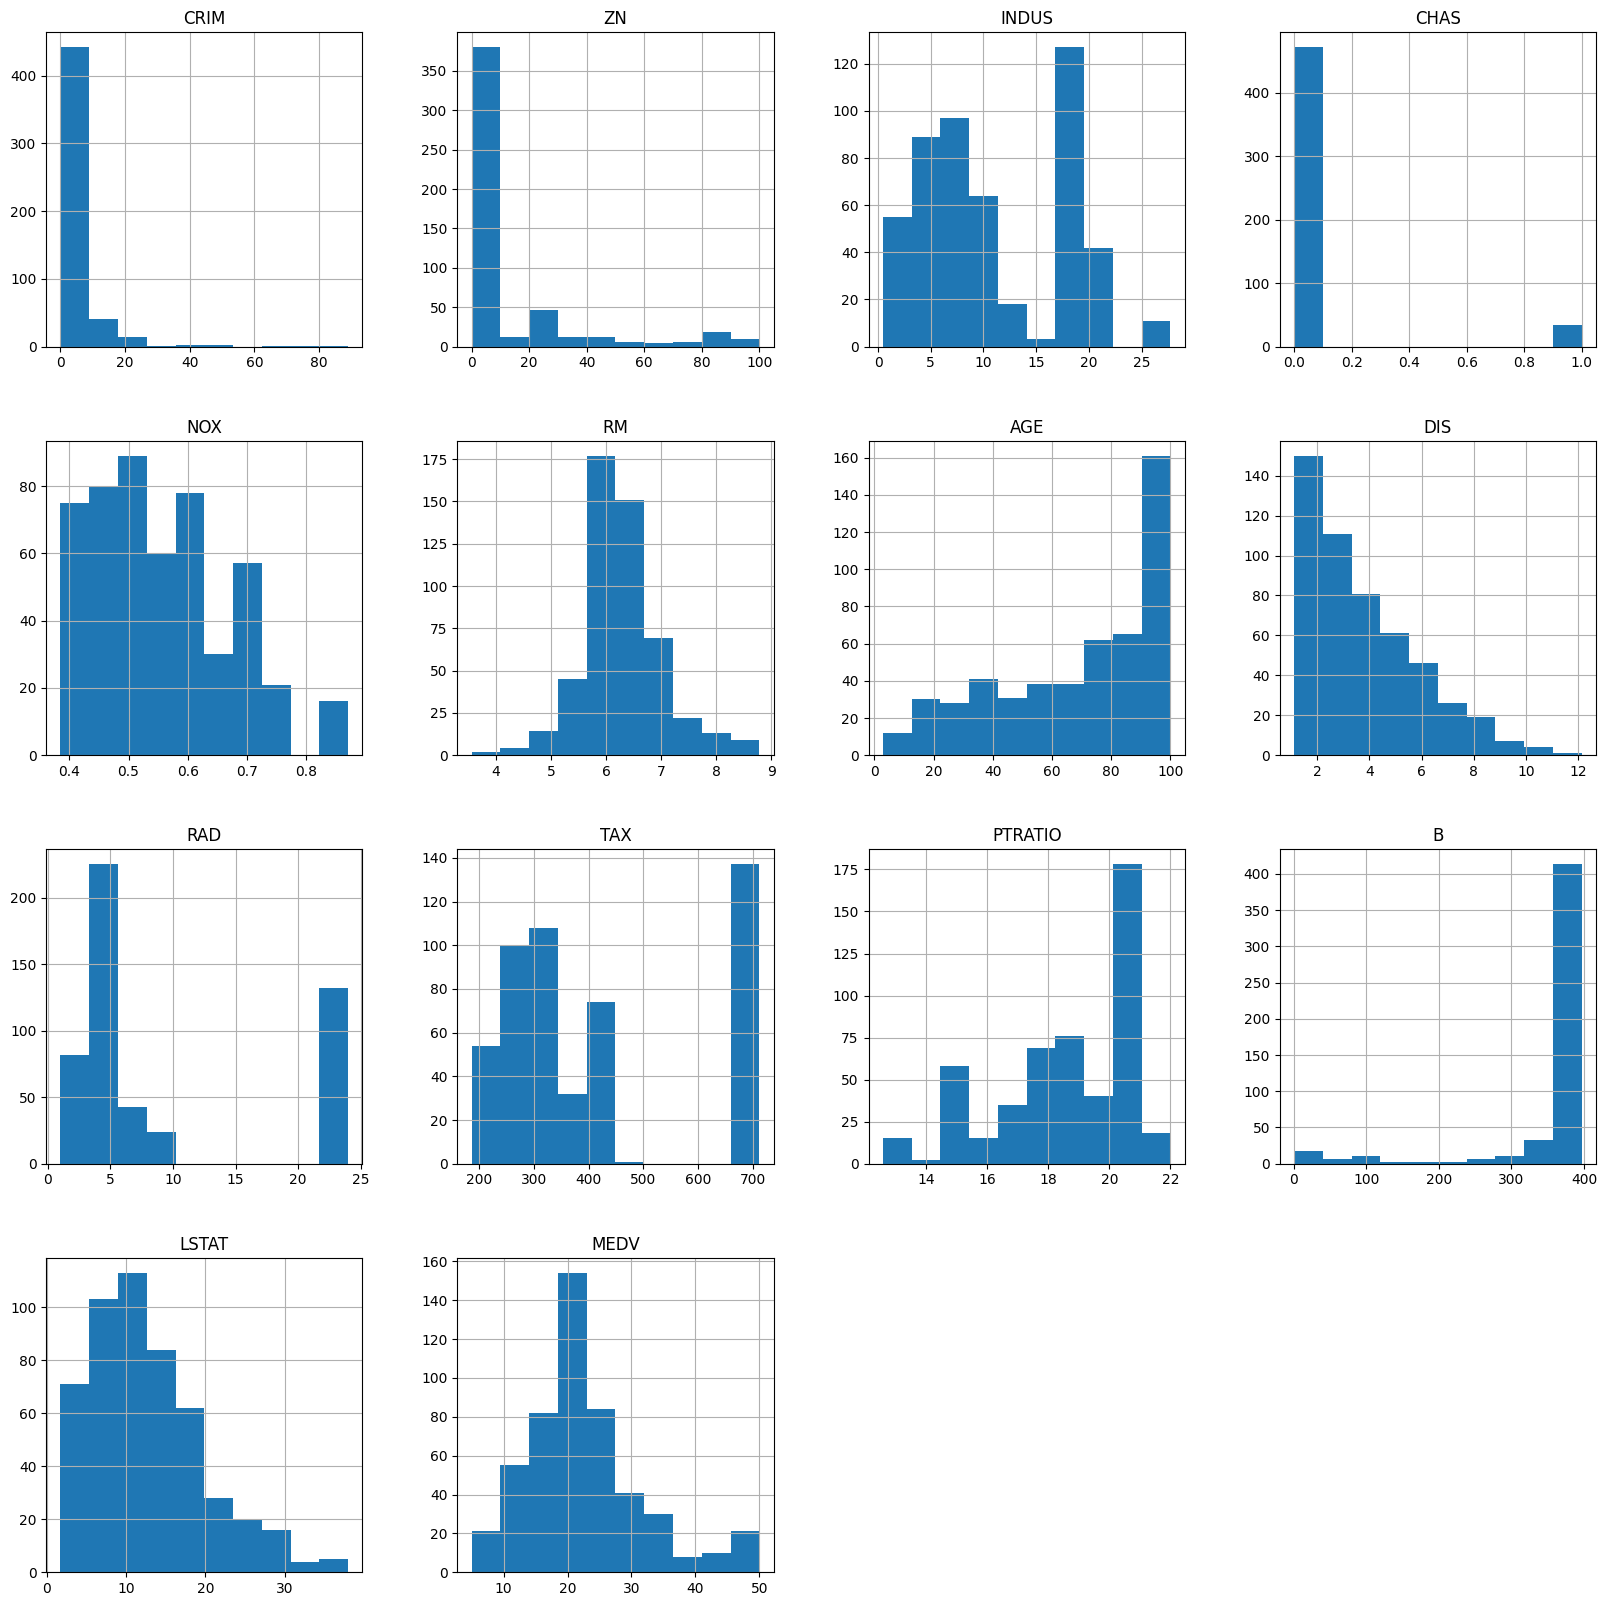

In [130]:
df.hist(bins = 10, figsize = (20,20))
plt.show()

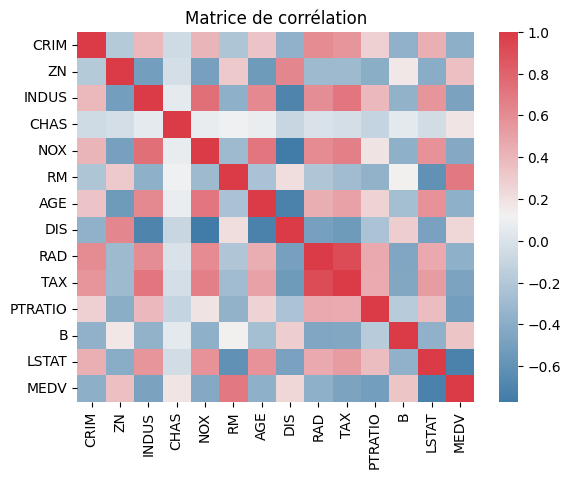

In [131]:
corr = df.corr()

# Création du masque avec dtype=bool (ou np.bool_)
mask = np.zeros_like(corr, dtype=bool)

sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(240, 10, as_cmap=True))
plt.title("Matrice de corrélation")
plt.show()


In [132]:
threshold = 0.2  # Seuil de significativité
columns_to_keep = corr[abs(corr) > threshold].index.tolist()

# Nouveau DataFrame filtré
df = df[columns_to_keep]

print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [133]:
X = df.drop(['MEDV'], axis=1).values
y = df['MEDV'].values

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [135]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [136]:
models = [
    ('LR', LinearRegression()),
    ('DTR', DecisionTreeRegressor()),
    ('RFR', RandomForestRegressor()),
    ('SVR', SVR()),
    ('KNNR', KNeighborsRegressor())
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: MSE = {mse:.2f}, R² = {r2:.2f}")

LR: MSE = 21.06, R² = 0.71
DTR: MSE = 16.46, R² = 0.77
RFR: MSE = 11.69, R² = 0.84
SVR: MSE = 21.76, R² = 0.70
KNNR: MSE = 18.16, R² = 0.75


Observations :
Random Forest Regressor (RFR) est le meilleur modèle !

Il a le plus faible MSE (11.69) ➝ Moins d'erreur.

Il a le R² le plus élevé (0.84) ➝ Meilleure capacité explicative.

In [137]:
# Définir la grille de recherche pour n_estimators
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

# Initialiser le modèle Random Forest pour la régression
rf = RandomForestRegressor(random_state=42)

# Utiliser GridSearchCV pour trouver le meilleur n_estimators
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']
best_score = grid_search.best_score_

print(f"Meilleur n_estimators : {best_n_estimators}")
print(f"Meilleur score (neg MSE) : {best_score}")


Meilleur n_estimators : 400
Meilleur score (neg MSE) : -12.789820247839925


In [138]:
model = RandomForestRegressor(n_estimators=400, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regressor: MSE = {mse:.2f}, R² = {r2:.2f}")


Random Forest Regressor: MSE = 11.85, R² = 0.84


In [139]:
y_pred

array([19.0745 , 22.62075, 20.967  , 21.835  , 20.59425, 13.61125,
       27.607  , 48.35975, 43.08125, 19.50075, 27.419  , 31.2965 ,
       33.5875 ,  8.502  , 15.8385 , 21.79075, 44.867  , 13.88025,
       18.18475, 29.52575, 20.82175, 43.18675, 22.6245 , 13.4885 ,
       33.34125, 19.488  , 10.80925, 20.1315 , 47.1515 , 22.609  ,
       25.75325,  8.6315 , 19.366  , 21.501  , 19.961  , 21.258  ,
       15.24025, 33.66625, 26.12525, 20.19825, 21.13125, 17.89875,
       13.5005 , 24.65725, 21.10125, 24.22725, 19.34   , 47.17   ,
       29.438  , 27.293  , 18.61   , 17.21875, 33.99825, 20.51975,
       21.29   , 24.33175, 20.173  , 11.38575, 27.9275 , 21.407  ,
       23.505  , 19.30625, 21.66375, 11.7545 , 21.009  , 25.2    ,
       21.67025, 24.20075, 23.344  , 17.172  , 33.375  , 21.4945 ,
       15.71075, 23.756  , 29.66375, 16.40375, 20.75775, 26.12225,
       20.3865 , 17.24025, 26.30525, 22.26925, 15.865  , 49.159  ,
       22.34275, 14.15075, 17.656  , 27.56625, 21.67925, 14.17

In [140]:
# Sélectionner un exemple de maison (première ligne du dataset)
example_house = df.iloc[0]
example_house_scaled = scaler.transform([example_house.drop(labels=["MEDV"]).values])

# Prédire la valeur médiane de la maison
predicted_price = model.predict(example_house_scaled)[0]
print(f"Valeur estimée de la maison: {predicted_price:.2f} $")


Valeur estimée de la maison: 25.42 $


In [141]:
df.iloc[0]

,0
CRIM,0.00632
ZN,18.00000
INDUS,2.31000
CHAS,0.00000
NOX,0.53800
RM,6.57500
AGE,65.20000
DIS,4.09000
RAD,1.00000
TAX,296.00000


Cela signifie que, sur la base des caractéristiques de cette maison, notre modèle estime que son prix médian devrait être légèrement plus élevé que la valeur réelle

In [142]:
pred = model.predict(X_test)

res = pd.DataFrame()
res['Y_Test'] = y_test
res['PRED'] = pred
res.head()

,Y_Test,PRED
0,20.1,19.07450
1,24.0,22.62075
2,23.0,20.96700
3,19.8,21.83500
4,20.5,20.59425


Les erreurs absolues sont faibles, ce qui indique que le modèle généralise bien.
L’erreur maximale est d’environ 2.03, ce qui peut être acceptable.
Pour l’observation 4, la prédiction est très proche de la valeur réelle (0.09 de différence).

Léger sous-ajustement (underfitting) : les prédictions semblent légèrement inférieures aux valeurs réelles dans plusieurs cas.